In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [86]:
df = pd.read_csv('/content/drive/MyDrive/ML/DataSets/covid_vaccine_prediction.csv')

In [87]:
df

,unique_id,covid_worry,covid_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,address,sex,income_level,marital_status,housing_status,employment,status,no_of_adults,no_of_children,covid_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,delhi,Female,Below Poverty,Not Married,Own,Not in Labor Force,untitled for umid,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,delhi,Male,Below Poverty,Not Married,Rent,Employed,umid card holder,0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,delhi,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,umid card holder,2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,delhi,Female,Below Poverty,Not Married,Rent,Not in Labor Force,umid card in-process,0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,delhi,Female,"<= $75,000, Above Poverty",Married,Own,Employed,umid card holder,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,delhi,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,untitled for umid,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,delhi,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,umid card in-process,1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,delhi,Female,NaN,Not Married,Own,NaN,umid card holder,0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,not mentioned,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,untitled for umid,1.0,0.0,0


In [88]:
df.isnull().sum()

unique_id                        0
covid_worry                     92
covid_awareness                116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_covid_vacc            2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_covid_vacc_effective        391
is_covid_risky                 388
sick_from_covid_vacc           395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
address                          0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [89]:
def null_df(data):
   nv = data.isnull().sum()
   nv_df = pd.DataFrame({'Feature':nv.index,'Null_val':nv.values,'Per_null':(nv.values/data.shape[0])*100})
   nv_df = nv_df.sort_values('Per_null',ascending=False)
   return nv_df


In [90]:
nv_df = null_df(df)
nv_df

,Feature,Null_val,Per_null
15,has_health_insur,12274,45.957989
26,income_level,4423,16.561201
10,dr_recc_covid_vacc,2160,8.087767
11,dr_recc_seasonal_vacc,2160,8.087767
28,housing_status,2042,7.645936
29,employment,1463,5.477965
27,marital_status,1408,5.272026
23,qualification,1407,5.268282
12,chronic_medic_condition,971,3.635751
13,cont_child_undr_6_mnths,820,3.070356


In [91]:
nv_df['Feature'][nv_df['Per_null']>7].values

array(['has_health_insur', 'income_level', 'dr_recc_covid_vacc',
       'dr_recc_seasonal_vacc', 'housing_status'], dtype=object)

In [92]:
df1 = df.copy()

In [93]:
df.drop(['unique_id','has_health_insur', 'income_level', 'dr_recc_covid_vacc','dr_recc_seasonal_vacc', 'housing_status'], axis=1,inplace=True)

In [94]:
df.duplicated().sum()

22

In [95]:
df.drop_duplicates(inplace=True)

In [96]:
df.shape

(26685, 28)

In [97]:
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(len(cat_cols))
print(cat_cols)
print(len(num_cols))
print(num_cols)

7
Index(['age_bracket', 'qualification', 'address', 'sex', 'marital_status',
       'employment', 'status'],
      dtype='object')
21
Index(['covid_worry', 'covid_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'chronic_medic_condition',
       'cont_child_undr_6_mnths', 'is_health_worker',
       'is_covid_vacc_effective', 'is_covid_risky', 'sick_from_covid_vacc',
       'is_seas_vacc_effective', 'is_seas_risky', 'sick_from_seas_vacc',
       'no_of_adults', 'no_of_children', 'covid_vaccine'],
      dtype='object')


In [98]:
for i in cat_cols:
  print(f'Feature - {i}')
  print(f'Data type - {df[i].dtypes}')
  print(f'Unique values - {df[i].nunique()}')
  print(f'Unique values are - {df[i].unique()}')
  print(f'null values - {df[i].isnull().sum()}')
  print(f'value counts are - {df[i].value_counts()}')
  print('-'*150)

Feature - age_bracket
Data type - object
Unique values - 5
Unique values are - ['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']
null values - 0
value counts are - 65+ Years        6837
55 - 64 Years    5555
45 - 54 Years    5233
18 - 34 Years    5214
35 - 44 Years    3846
Name: age_bracket, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------
Feature - qualification
Data type - object
Unique values - 4
Unique values are - ['< 12 Years' '12 Years' 'College Graduate' 'Some College' nan]
null values - 1407
value counts are - College Graduate    10083
Some College         7038
12 Years             5794
< 12 Years           2363
Name: qualification, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------
Feature - address
Data type - object
Uniqu

In [99]:
df.qualification.fillna('no_info', inplace=True)
df.marital_status.fillna('no_info', inplace=True)
df.employment.fillna('no_info', inplace=True)

In [100]:
for i in num_cols:
  print(f'Feature - {i}')
  print(f'Data type - {df[i].dtypes}')
  print(f'Null values - {df[i].isnull().sum()}')
  print(f'Unique value - {df[i].nunique()}')
  print(f'Unique values are - {df[i].unique()}')
  print(f'value counts - {df[i].value_counts()}')
  print('-'*150)

Feature - covid_worry
Data type - float64
Null values - 92
Unique value - 4
Unique values are - [ 1.  3.  2.  0. nan]
value counts - 2.0    10567
1.0     8145
3.0     4587
0.0     3294
Name: covid_worry, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------
Feature - covid_awareness
Data type - float64
Null values - 116
Unique value - 3
Unique values are - [ 0.  2.  1. nan]
value counts - 1.0    14588
2.0     9475
0.0     2506
Name: covid_awareness, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------
Feature - antiviral_medication
Data type - float64
Null values - 71
Unique value - 2
Unique values are - [ 0.  1. nan]
value counts - 0.0    25313
1.0     1301
Name: antiviral_medication, dtype: int64
-----------------------------------------------------------------------

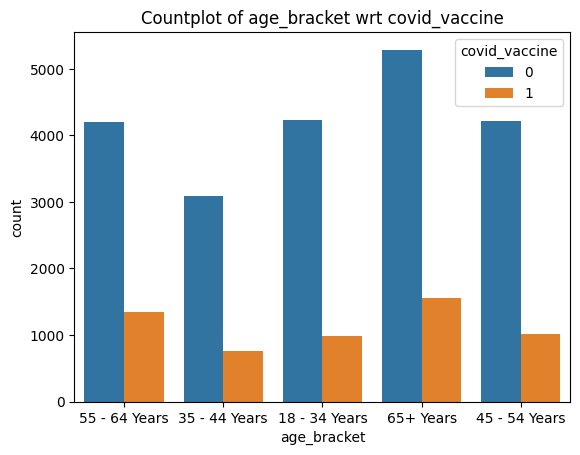

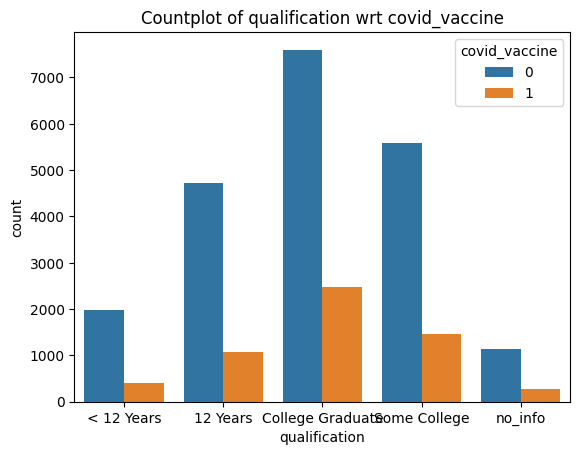

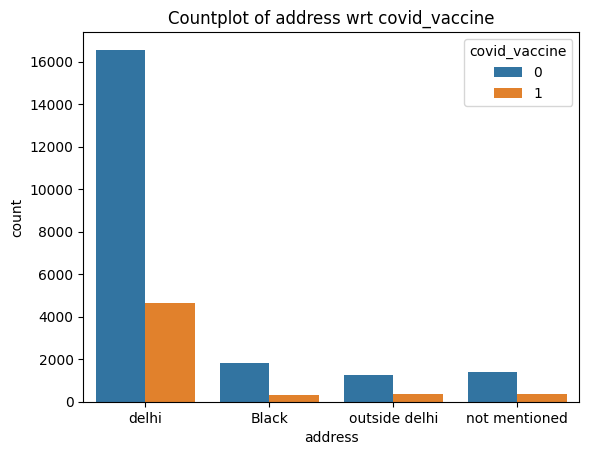

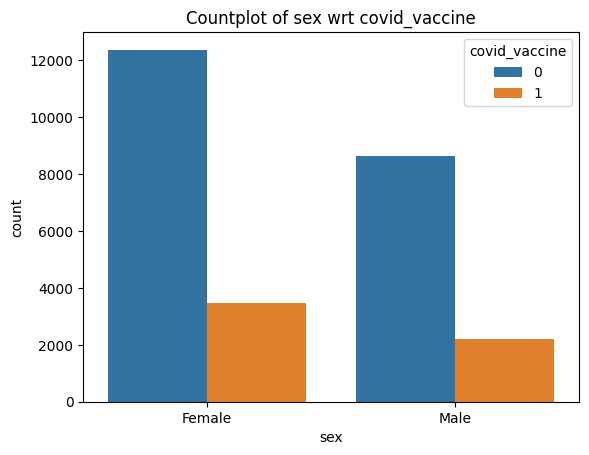

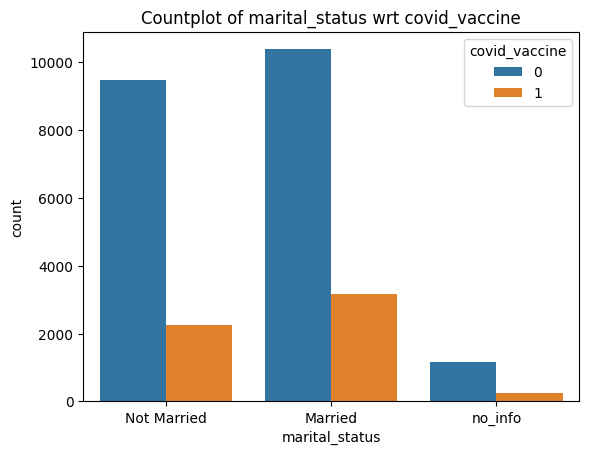

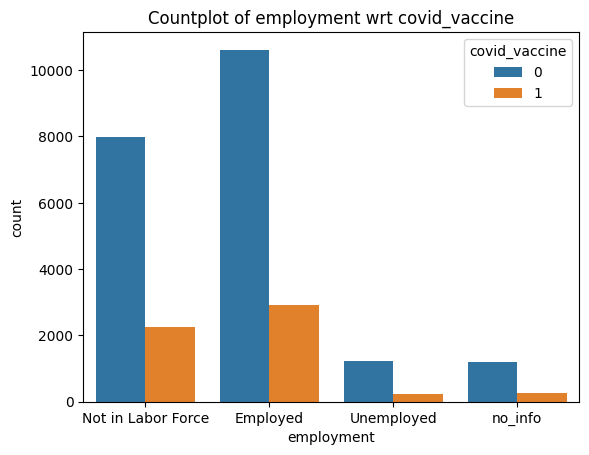

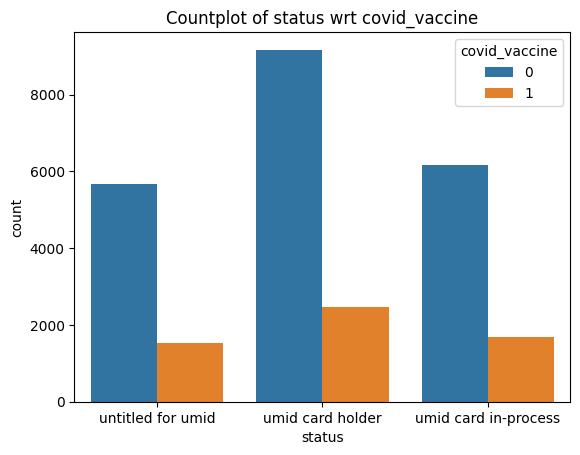

In [101]:
for i in cat_cols:
  sn.countplot(x = df[i], hue=df['covid_vaccine'])
  plt.title(f'Countplot of {i} wrt covid_vaccine')
  plt.show()

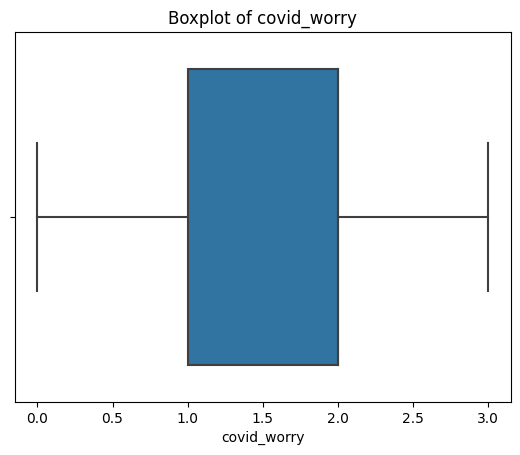

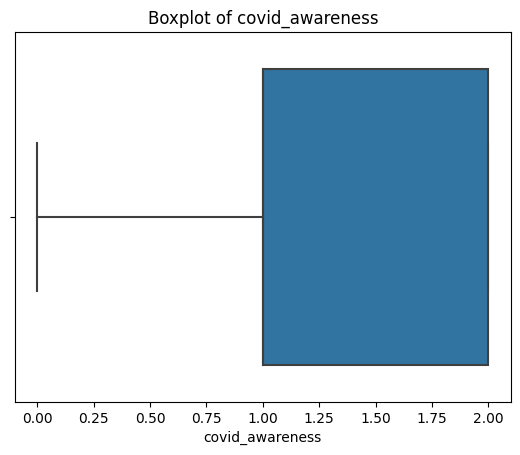

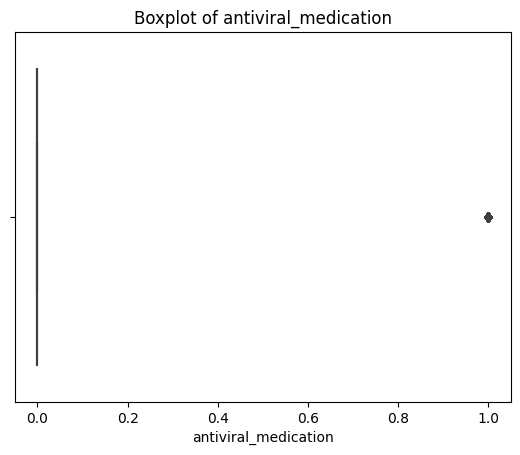

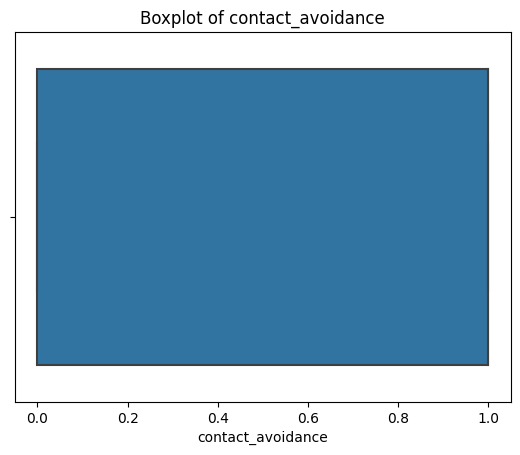

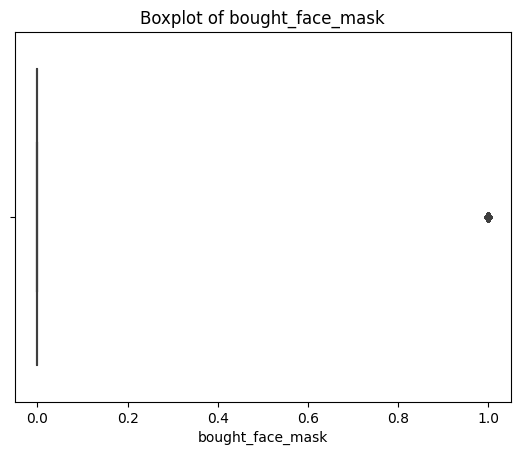

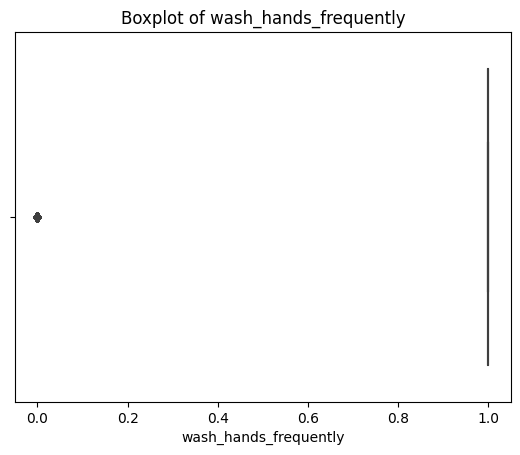

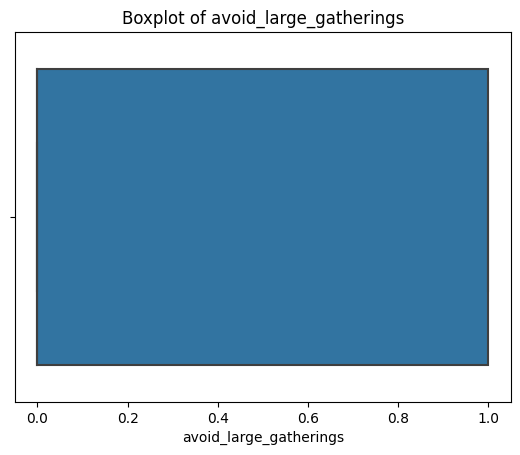

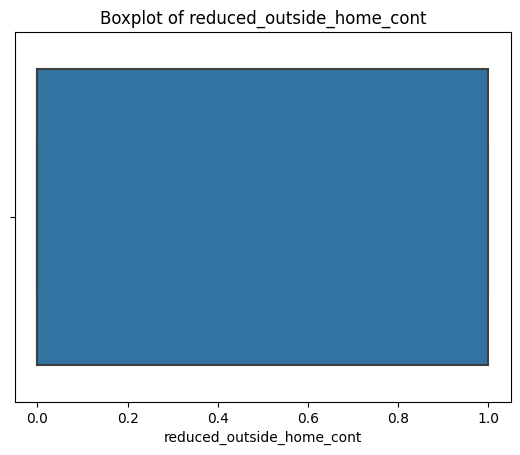

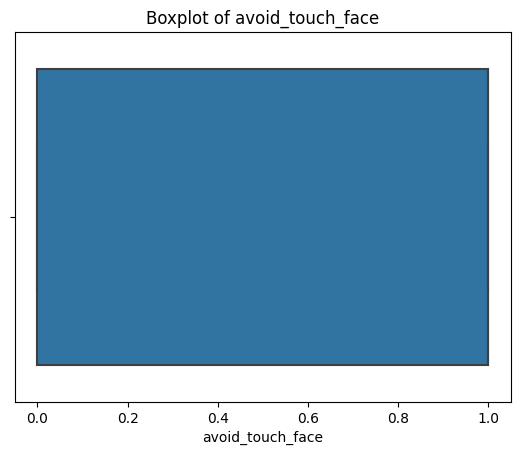

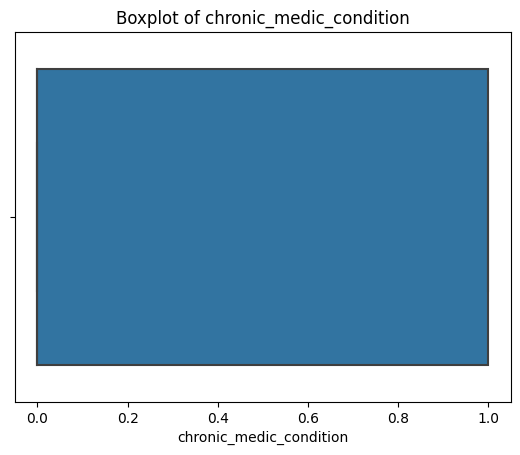

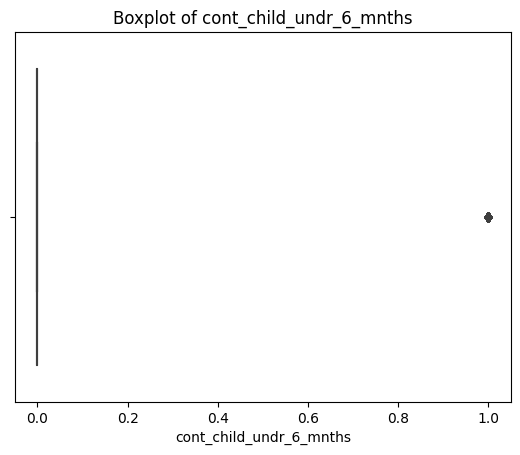

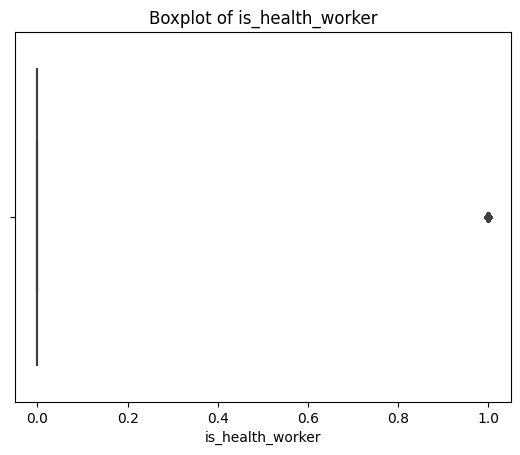

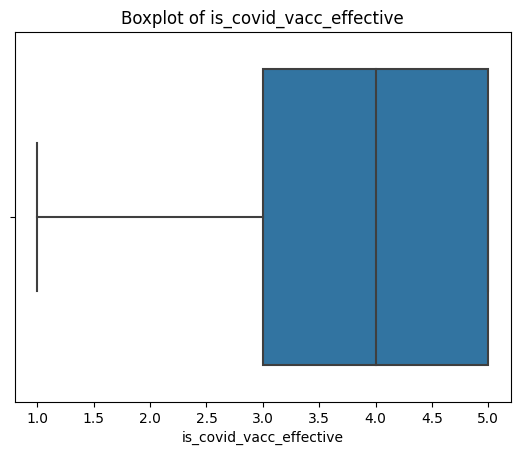

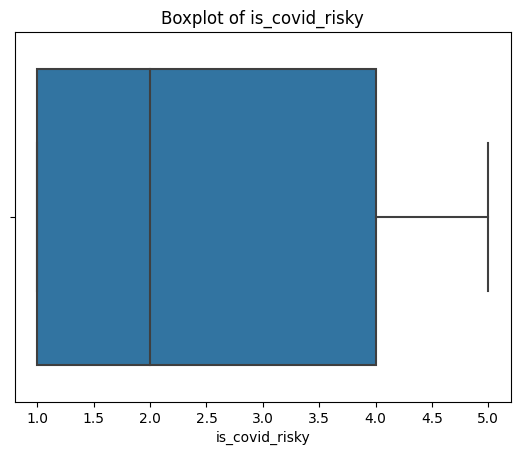

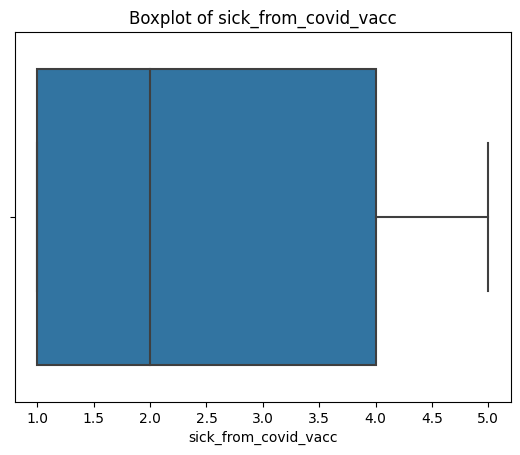

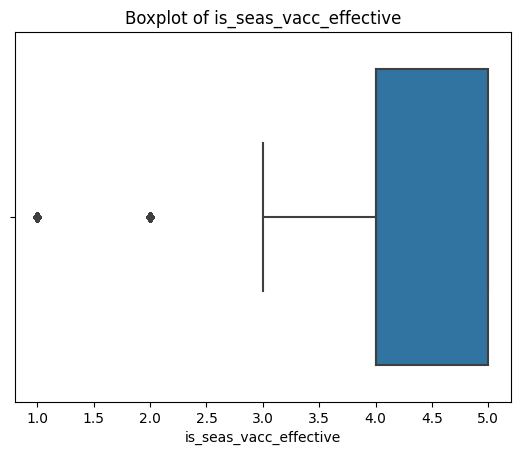

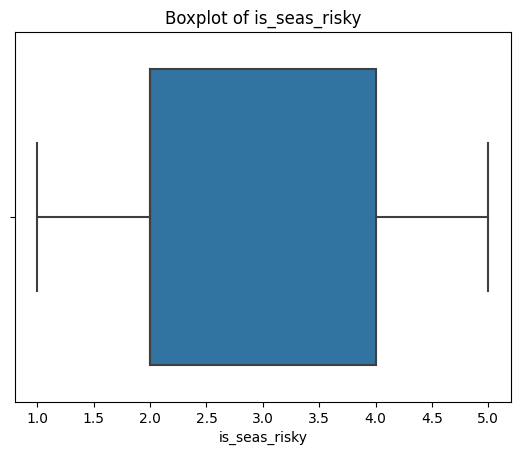

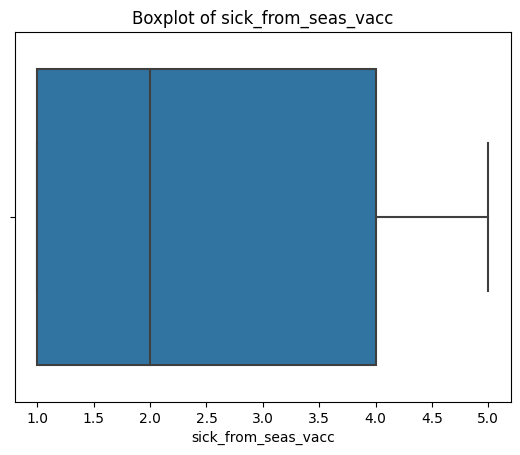

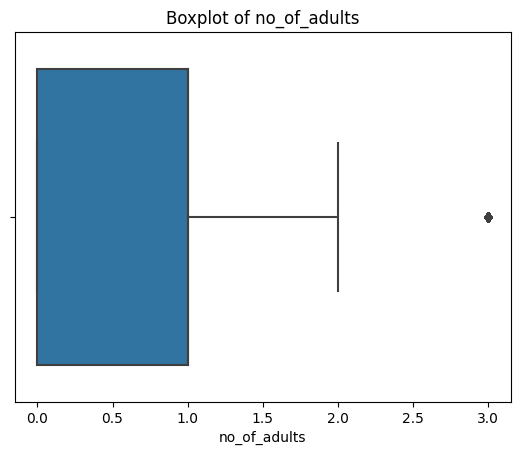

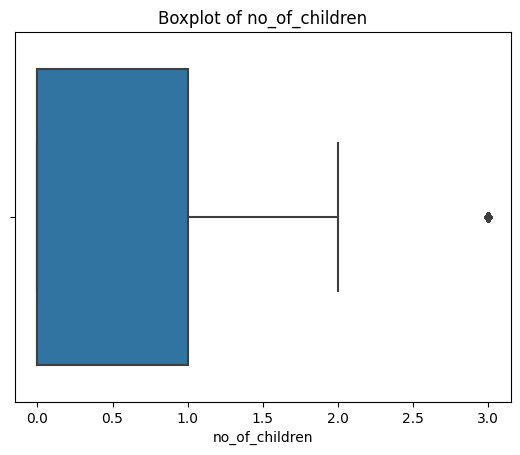

In [102]:
for i in num_cols[:-1]:
  sn.boxplot(x = df[i])
  plt.title(f'Boxplot of {i}')
  plt.show()

In [103]:
df.describe([0.01,0.02,0.03,0.04,0.05]).T

,count,mean,std,min,1%,2%,3%,4%,5%,50%,max
covid_worry,26593.0,1.618471,0.910334,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0
covid_awareness,26569.0,1.262298,0.618185,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
antiviral_medication,26614.0,0.048884,0.215630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
contact_avoidance,26477.0,0.725611,0.446214,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
bought_face_mask,26666.0,0.069039,0.253526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
wash_hands_frequently,26643.0,0.825658,0.379411,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
avoid_large_gatherings,26598.0,0.358824,0.479664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
reduced_outside_home_cont,26603.0,0.337443,0.472846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
avoid_touch_face,26557.0,0.677260,0.467533,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
chronic_medic_condition,25714.0,0.283348,0.450632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [104]:
df.describe([0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,50%,95%,96%,97%,98%,99%,max
covid_worry,26593.0,1.618471,0.910334,0.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0
covid_awareness,26569.0,1.262298,0.618185,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
antiviral_medication,26614.0,0.048884,0.215630,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
contact_avoidance,26477.0,0.725611,0.446214,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
bought_face_mask,26666.0,0.069039,0.253526,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
wash_hands_frequently,26643.0,0.825658,0.379411,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
avoid_large_gatherings,26598.0,0.358824,0.479664,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
reduced_outside_home_cont,26603.0,0.337443,0.472846,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
avoid_touch_face,26557.0,0.677260,0.467533,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
chronic_medic_condition,25714.0,0.283348,0.450632,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


In [105]:
df['no_of_children'] = np.where(df['no_of_children']>2, 2, df['no_of_children'])
df['no_of_adults'] = np.where(df['no_of_adults'] > 2, 2, df['no_of_adults'])
df['is_seas_vacc_effective'] = np.where(df['is_seas_vacc_effective']>3,3, df['is_seas_vacc_effective'])

<ipython-input-106-15a5939c4cc3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


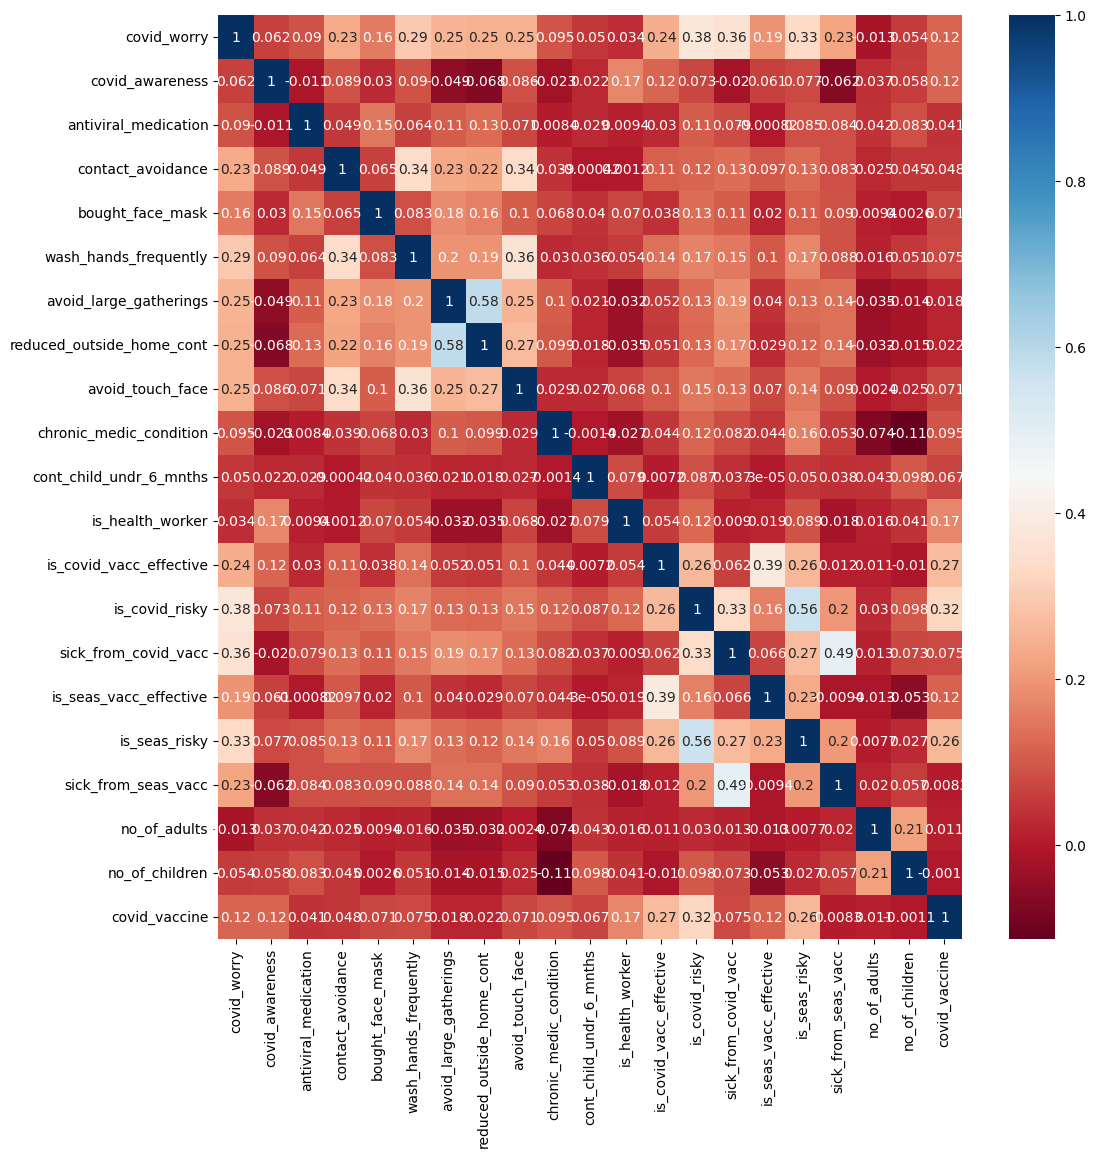

In [106]:
corr = df.corr()
plt.figure(figsize=(12,12))
sn.heatmap(corr, annot=True, cmap='RdBu')
plt.show()

<ipython-input-107-c343f2a96532>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


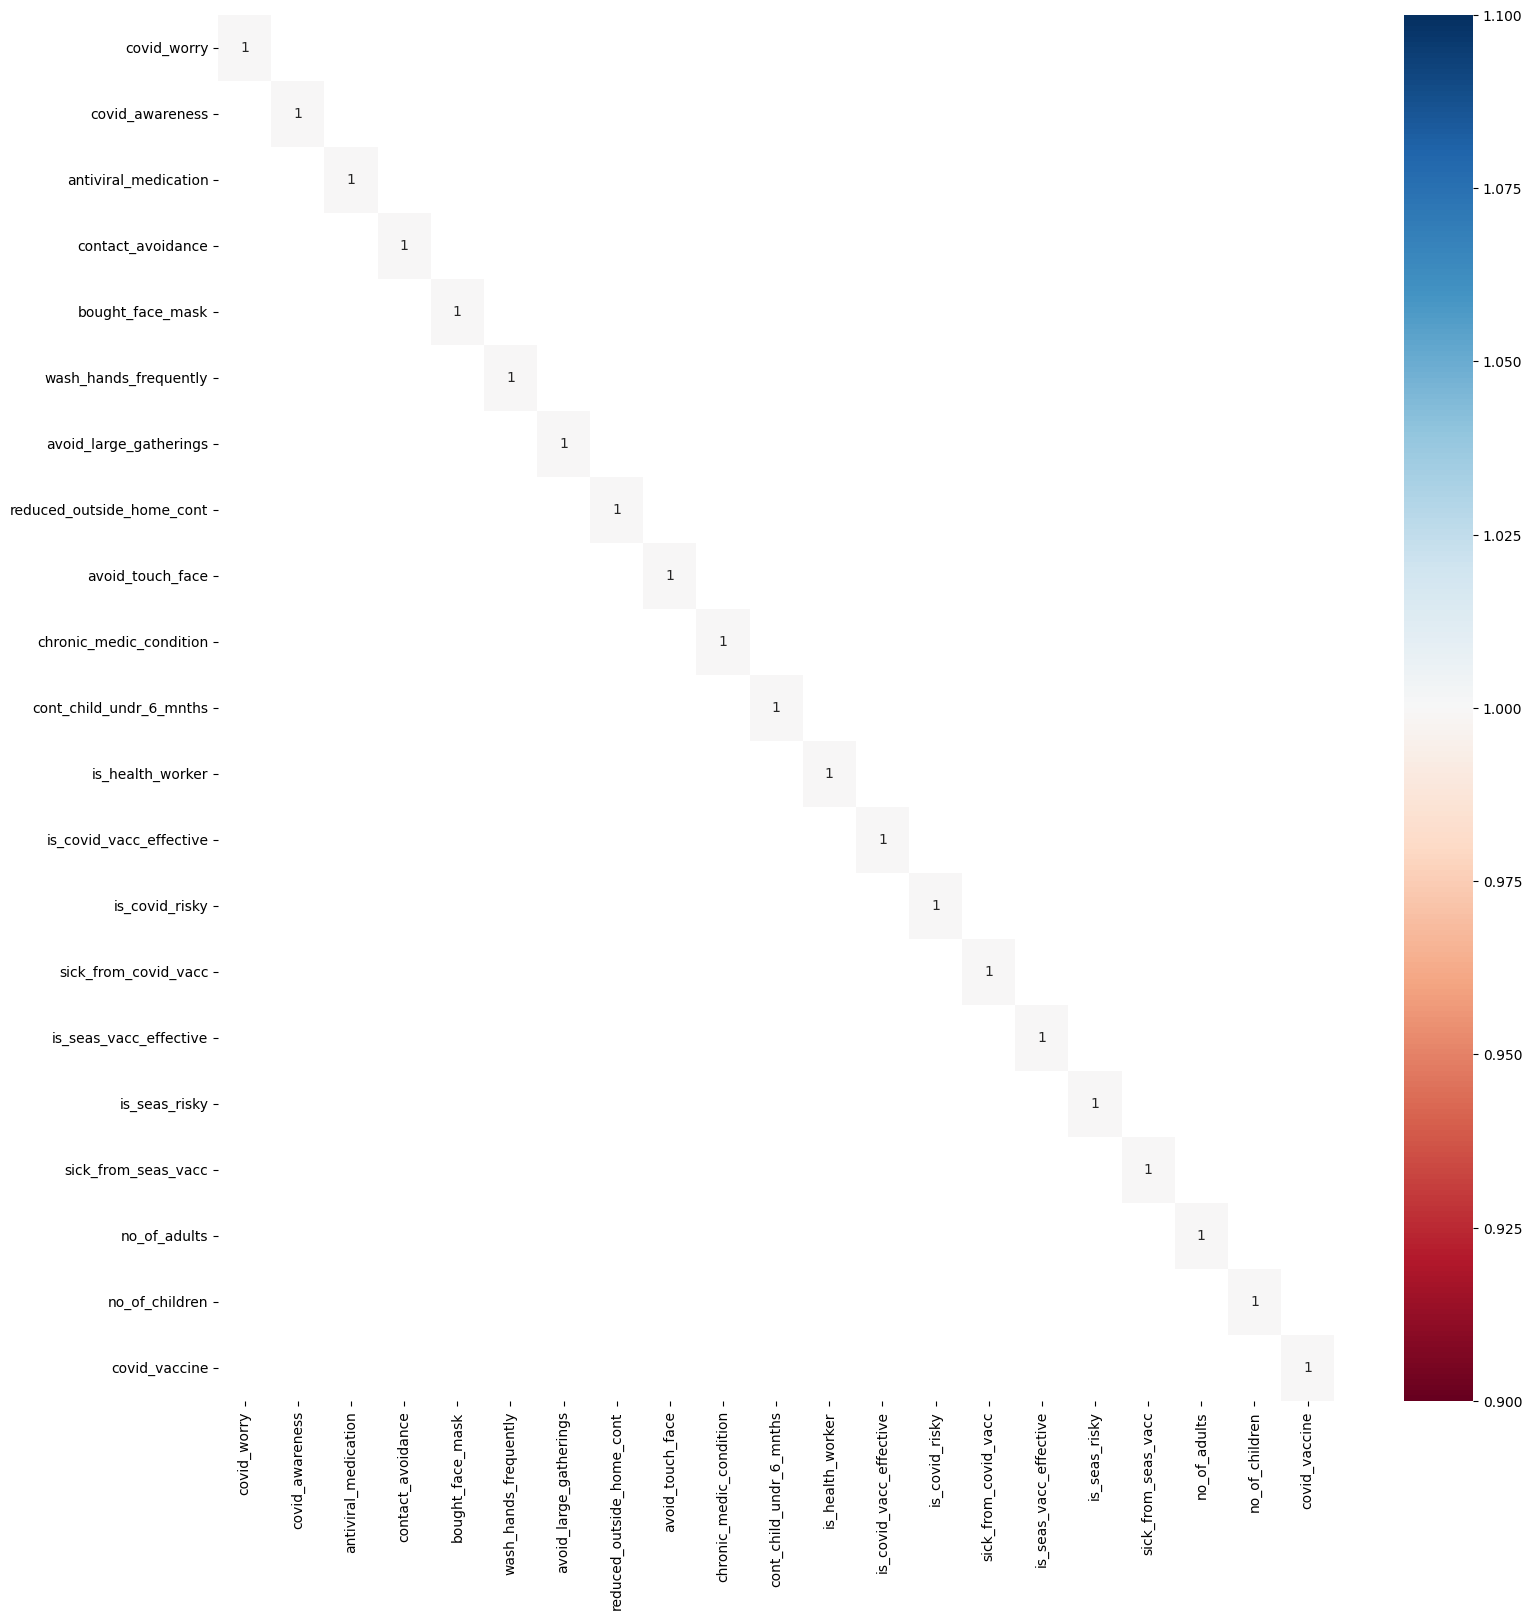

In [107]:
corr = df.corr()
plt.figure(figsize=(18,18))
sn.heatmap(corr[abs(corr)>0.85], annot=True, cmap='RdBu')
plt.show()

In [108]:
from catboost import CatBoostClassifier
from sklearn.ensemble import (
	    AdaBoostClassifier,
	    GradientBoostingClassifier,
	    RandomForestClassifier,
	)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [109]:
X_num = df[['covid_worry', 'covid_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'chronic_medic_condition',
       'cont_child_undr_6_mnths', 'is_health_worker',
       'is_covid_vacc_effective', 'is_covid_risky', 'sick_from_covid_vacc',
       'is_seas_vacc_effective', 'is_seas_risky', 'sick_from_seas_vacc',
       'no_of_adults', 'no_of_children']]
X_char = df[['age_bracket', 'qualification', 'address', 'sex', 'marital_status',
       'employment', 'status']]
num_attr = list(X_num)
char_attr = list(X_char)

In [110]:
X1 = df.drop('covid_vaccine', axis=1)
y1 = df[['covid_vaccine']]

In [111]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1,y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=4200000)
print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(21348, 27)
(5337, 27)
(21348, 1)
(5337, 1)


In [112]:
pp = Pipeline([
    ('std)scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='median'))
])
pp.fit_transform(X_num)

ct = ColumnTransformer([
    ('num', pp, num_attr),
    ('ohe', OneHotEncoder(), char_attr)
])

X_train_prep = ct.fit_transform(X_train1)
X_test_prep = ct.fit_transform(X_test1)

In [113]:
from catboost import CatBoostClassifier
from sklearn.ensemble import (
	    AdaBoostClassifier,
	    GradientBoostingClassifier,
	    RandomForestClassifier,
	)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [114]:
models = {
	                "Random Forest": RandomForestClassifier(),
	            #    "Decision Tree": DecisionTreeClassifier(),
	              #  "Gradient Boosting": GradientBoostingClassifier(),
	                "Logistic Regression": LogisticRegression(),
	                "XGBClassifier": XGBClassifier(),
	                "CatBoosting Classifier": CatBoostClassifier(verbose=False),
	            #    "AdaBoost Classifier": AdaBoostClassifier(),
	            }
params={
	             #   "Decision Tree": {
	              #      'criterion':['gini', 'entropy','log_loss'],
                #        'max_depth':[8,9,10],
                  #      'min_samples_split':[8,10,12]
	                    # 'splitter':['best','random'],
	                    # 'max_features':['sqrt','log2'],
	              #  },
	                "Random Forest":{
	                    # 'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],

	                    # 'max_features':['sqrt','log2',None],
                        'criterion':['gini', 'entropy','log_loss'],
                        'max_depth':[8,9,10],
                        'min_samples_split':[8,10,12],
	                    'n_estimators': [8,16,32]
	                },
	               # "Gradient Boosting":{
	                    # 'loss':['squared_error', 'huber', 'absolute_error', 'quantile'],
                     #   'loss':['log_loss', 'exponential'],
	                   # 'learning_rate':[.1,.01],
	                  #  'subsample':[0.6,0.7],
	                    # 'criterion':['squared_error', 'friedman_mse'],
	                    # 'max_features':['auto','sqrt','log2'],
	                  #  'n_estimators': [8,16,32]
	              #  },
	                "Logistic Regression":{},
	                "XGBClassifier":{
	                    'learning_rate':[.1,.01],
	                    'n_estimators': [8,16,32]
	                },
	              "CatBoosting Classifier":{
	                    'depth': [6,8,10],
	                    'learning_rate': [0.01, 0.05],
	                    'iterations': [30, 50]
	                },
	                #"AdaBoost Classifier":{
	                 #   'learning_rate':[.1,.01],
	                    # 'loss':['linear','square','exponential'],
	                  #  'n_estimators': [8,16,32]
	              #  }

	            }


In [115]:
report = {}

for i in range(len(list(models))):
            model = list(models.values())[i]
            para=params[list(models.keys())[i]]

            gs = GridSearchCV(model,para)
            gs.fit(X_train_prep,y_train1)

            model.set_params(**gs.best_params_)
            model.fit(X_train_prep,y_train1)

            #model.fit(X_train, y_train)  # Train model

            y_train_pred1 = model.predict(X_train_prep)

            y_test_pred1 = model.predict(X_test_prep)

            train_model_score1 = accuracy_score(y_train1, y_train_pred1)

            test_model_score1 = accuracy_score(y_test1, y_test_pred1)

            report[list(models.keys())[i]] = test_model_score1



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

In [116]:
print(report)

{'Random Forest': 0.8221847479857598, 'Logistic Regression': 0.8210605208918869, 'XGBClassifier': 0.8238710886265692, 'CatBoosting Classifier': 0.8214352632565112}


In [117]:
best_model_score = max(sorted(report.values()))
best_model_name = list(report.keys())[
	                list(report.values()).index(best_model_score)
	            ]
best_model = models[best_model_name]

if best_model_score<0.6:
	print("No best model found")
else:
  print(f"Best found model on both training and testing dataset is {best_model_name}")

predicted=best_model.predict(X_test_prep)
a_score = accuracy_score(y_test1, predicted)
a_score

Best found model on both training and testing dataset is XGBClassifier


0.8238710886265692

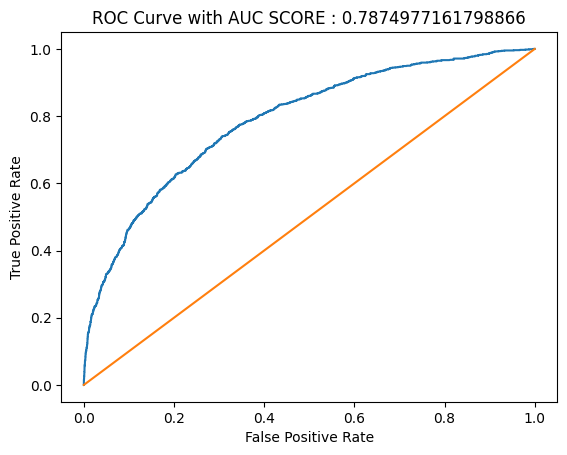

In [118]:
from sklearn.metrics import roc_curve, roc_auc_score
predicted_proba = best_model.predict_proba(X_test_prep)
fpr, tpr, thresh = roc_curve( y_test1, predicted_proba[:,1])
auc_score = roc_auc_score( y_test1, predicted_proba[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1])
plt.title(f'ROC Curve with AUC SCORE : {auc_score}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()